# Trabajando con Missing Values en Pandas

Un missing value (NaN) es un valor que NO está presente por alguna razón. Una posibilidad es que los datos no fueron colectados y otra es que en realidad nunca existieron.

Un ejemplo común en finanzas por ejemplo es el hecho de que en una serie de tiempo dos conjuntos de datos comiencen en fechas distintas, por lo que los valores faltantes se marcarán en Pandas con missing values (NaN).

### Ingresar missing values por re-indexing

Además de la colección de datos, una situación común en la que **introducimos** missing values (NaN) en Pandas es cuando re-indexamos un DataFrame

In [106]:
import numpy as np
import pandas as pd

In [107]:
df = pd.DataFrame(np.random.randn(5, 3), index=['a', 'c', 'e', 'f', 'h'], columns=['one','two','three'])
df

,one,two,three
a,0.280480,-1.282801,-0.067797
c,0.101340,-0.193422,-0.074969
e,-0.269986,-0.201464,0.646269
f,0.313181,0.801588,-0.221782
h,-1.039180,0.970145,-1.325889


In [108]:
df['four'] = 'bar'
df['five'] = df['one'] > 0

In [109]:
df

,one,two,three,four,five
a,0.280480,-1.282801,-0.067797,bar,True
c,0.101340,-0.193422,-0.074969,bar,True
e,-0.269986,-0.201464,0.646269,bar,False
f,0.313181,0.801588,-0.221782,bar,True
h,-1.039180,0.970145,-1.325889,bar,False


In [110]:
df2 = df.reindex(['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h'])
df2

,one,two,three,four,five
a,0.280480,-1.282801,-0.067797,bar,True
b,NaN,NaN,NaN,NaN,NaN
c,0.101340,-0.193422,-0.074969,bar,True
d,NaN,NaN,NaN,NaN,NaN
e,-0.269986,-0.201464,0.646269,bar,False
f,0.313181,0.801588,-0.221782,bar,True
g,NaN,NaN,NaN,NaN,NaN
h,-1.039180,0.970145,-1.325889,bar,False


### Missing values: isnull() y notnull()

In [111]:
df2['one']

a    0.280480
b         NaN
c    0.101340
d         NaN
e   -0.269986
f    0.313181
g         NaN
h   -1.039180
Name: one, dtype: float64

In [112]:
pd.isnull(df2['one'])

a    False
b     True
c    False
d     True
e    False
f    False
g     True
h    False
Name: one, dtype: bool

In [113]:
df2['four'].notnull()

a     True
b    False
c     True
d    False
e     True
f     True
g    False
h     True
Name: four, dtype: bool

In [116]:
df2[df2['four'].notnull()]

,one,two,three,four,five
a,0.280480,-1.282801,-0.067797,bar,True
c,0.101340,-0.193422,-0.074969,bar,True
e,-0.269986,-0.201464,0.646269,bar,False
f,0.313181,0.801588,-0.221782,bar,True
h,-1.039180,0.970145,-1.325889,bar,False


#### Nota: NaN no es igual a otro NaN

In [17]:
None == None

True

In [18]:
np.nan == np.nan

False

In [120]:
df2['one']==np.nan

a    False
b    False
c    False
d    False
e    False
f    False
g    False
h    False
Name: one, dtype: bool

Conclusión: utilizar función isnull y método notnull para evaluar columnas de DataFrames

### Missing Values con fechas

Para valores del tipo datetime, NaT representa un missing value. 

In [21]:
df3 = df.copy()
df3

,one,two,three,four,five
a,-0.351376,1.081384,-1.031062,bar,False
c,-1.274544,0.237918,0.992847,bar,False
e,-0.478969,-1.481819,1.569538,bar,False
f,0.534601,-0.133952,-0.079523,bar,True
h,-1.282061,-0.099561,-1.023368,bar,False


In [23]:
df3['timestamp'] = pd.Timestamp('20120101')
df3

,one,two,three,four,five,timestamp
a,-0.351376,1.081384,-1.031062,bar,False,2012-01-01
c,-1.274544,0.237918,0.992847,bar,False,2012-01-01
e,-0.478969,-1.481819,1.569538,bar,False,2012-01-01
f,0.534601,-0.133952,-0.079523,bar,True,2012-01-01
h,-1.282061,-0.099561,-1.023368,bar,False,2012-01-01


In [121]:
df3.loc[['a','c','h'],['one','timestamp','four']] = np.nan
df3

,one,two,three,four,five,timestamp
a,NaN,1.081384,-1.031062,NaN,False,NaT
c,NaN,0.237918,0.992847,NaN,False,NaT
e,-0.478969,-1.481819,1.569538,NaN,False,2012-01-01
f,0.534601,-0.133952,-0.079523,bar,True,2012-01-01
h,NaN,-0.099561,-1.023368,NaN,False,NaT


In [122]:
df3.get_dtype_counts()

bool              1
datetime64[ns]    1
float64           3
object            1
dtype: int64

### Insertar Missing Values

In [28]:
s = pd.Series([1, 2, 3])
s

0    1
1    2
2    3
dtype: int64

In [30]:
s.loc[0] = None
s

0    NaN
1    2.0
2    3.0
dtype: float64

Para las series de tipo object pandas va a utilizar tal cual el valor que le pasemos

In [34]:
s2 = pd.Series(["a", "b", "c"])

In [35]:
s2.loc[0] = None

In [36]:
s2.loc[1] = np.nan

In [37]:
s2

0    None
1     NaN
2       c
dtype: object

### Cálculos con Missing Values

In [123]:
a = pd.DataFrame(np.random.random(10).reshape(5,2),index=['a','b','c','d','e'],columns=['one','two'])

In [124]:
a.loc[['a','b'],['one']] = None
a

,one,two
a,NaN,0.566244
b,NaN,0.876985
c,0.361833,0.750217
d,0.729304,0.822591
e,0.599071,0.466711


In [125]:
b = pd.DataFrame(np.random.random(15).reshape(5,3),index=['a','b','c','d','e'],columns=['one','two','three'])

In [126]:
b.loc[['a','b','e'],'one'] = None
b

,one,two,three
a,NaN,0.418333,0.160460
b,NaN,0.976301,0.271075
c,0.240037,0.220246,0.077229
d,0.034966,0.510015,0.922486
e,NaN,0.024374,0.292695


In [56]:
c = a+b
c

,one,three,two
a,NaN,NaN,1.173325
b,NaN,NaN,0.602096
c,1.105493,NaN,0.422959
d,0.970592,NaN,0.857844
e,NaN,NaN,1.264291


In [59]:
c['one'].sum() #toma los NaN como 0

2.0760847703931566

In [58]:
c['one'].mean() #toma los NaN como inexistentes

1.0380423851965783

In [60]:
a.groupby('one').mean() #ignora los NaN para hacer el group by

,two
one,
0.384005,0.575783
0.842143,0.144686
0.929159,0.519675


### Limpiar o rellenar missing values

In [127]:
df3

,one,two,three,four,five,timestamp
a,NaN,1.081384,-1.031062,NaN,False,NaT
c,NaN,0.237918,0.992847,NaN,False,NaT
e,-0.478969,-1.481819,1.569538,NaN,False,2012-01-01
f,0.534601,-0.133952,-0.079523,bar,True,2012-01-01
h,NaN,-0.099561,-1.023368,NaN,False,NaT


#### Llenar con un valor escalar

In [128]:
df3.fillna(0)

,one,two,three,four,five,timestamp
a,0.000000,1.081384,-1.031062,0,False,1970-01-01
c,0.000000,0.237918,0.992847,0,False,1970-01-01
e,-0.478969,-1.481819,1.569538,0,False,2012-01-01
f,0.534601,-0.133952,-0.079523,bar,True,2012-01-01
h,0.000000,-0.099561,-1.023368,0,False,1970-01-01


In [130]:
df3['one'].mean()

0.027816010799624147

In [132]:
promedio = (df3.loc['e','one']+df3.loc['f','one'])/2
promedio

0.027816010799624147

In [133]:
df3.loc[['c','e'],['four']] = np.nan
df3

,one,two,three,four,five,timestamp
a,NaN,1.081384,-1.031062,NaN,False,NaT
c,NaN,0.237918,0.992847,NaN,False,NaT
e,-0.478969,-1.481819,1.569538,NaN,False,2012-01-01
f,0.534601,-0.133952,-0.079523,bar,True,2012-01-01
h,NaN,-0.099561,-1.023368,NaN,False,NaT


In [134]:
df3['four'].fillna('Valor_Faltante')

a    Valor_Faltante
c    Valor_Faltante
e    Valor_Faltante
f               bar
h    Valor_Faltante
Name: four, dtype: object

In [135]:
df3['four'].fillna('Missing')

a    Missing
c    Missing
e    Missing
f        bar
h    Missing
Name: four, dtype: object

#### Llenar hacia adelante o hacia atrás

In [74]:
df3

,one,two,three,four,five,timestamp
a,NaN,1.081384,-1.031062,bar,False,NaT
c,NaN,0.237918,0.992847,NaN,False,NaT
e,-0.478969,-1.481819,1.569538,NaN,False,2012-01-01
f,0.534601,-0.133952,-0.079523,bar,True,2012-01-01
h,NaN,-0.099561,-1.023368,bar,False,NaT


In [77]:
df3.fillna(method='ffill')

,one,two,three,four,five,timestamp
a,NaN,1.081384,-1.031062,bar,False,NaT
c,NaN,0.237918,0.992847,bar,False,NaT
e,-0.478969,-1.481819,1.569538,bar,False,2012-01-01
f,0.534601,-0.133952,-0.079523,bar,True,2012-01-01
h,0.534601,-0.099561,-1.023368,bar,False,2012-01-01


In [78]:
df3.fillna(method='bfill')

,one,two,three,four,five,timestamp
a,-0.478969,1.081384,-1.031062,bar,False,2012-01-01
c,-0.478969,0.237918,0.992847,bar,False,2012-01-01
e,-0.478969,-1.481819,1.569538,bar,False,2012-01-01
f,0.534601,-0.133952,-0.079523,bar,True,2012-01-01
h,NaN,-0.099561,-1.023368,bar,False,NaT


In [79]:
df3.fillna(method='bfill').fillna(method='ffill')

,one,two,three,four,five,timestamp
a,-0.478969,1.081384,-1.031062,bar,False,2012-01-01
c,-0.478969,0.237918,0.992847,bar,False,2012-01-01
e,-0.478969,-1.481819,1.569538,bar,False,2012-01-01
f,0.534601,-0.133952,-0.079523,bar,True,2012-01-01
h,0.534601,-0.099561,-1.023368,bar,False,2012-01-01


### Llenar Missing Values con un objeto de Pandas

In [136]:
dff = pd.DataFrame(np.random.randn(10,3), columns=list('ABC'))
dff.iloc[3:5,0] = np.nan
dff.iloc[4:6,1] = np.nan
dff.iloc[5:8,2] = np.nan
dff

,A,B,C
0,-0.750184,0.279692,1.865030
1,-0.339818,-0.496805,0.332607
2,1.455267,-0.846548,-0.743275
3,NaN,1.482737,-0.632186
4,NaN,NaN,-0.961120
5,-0.907277,NaN,NaN
6,-0.321999,-0.648812,NaN
7,-0.270758,-0.048066,NaN
8,-0.175676,0.180088,-1.151823
9,0.761986,-1.543394,-0.943142


In [82]:
dff.fillna(dff.mean())

,A,B,C
0,-0.601031,-0.229829,0.420546
1,0.731110,0.098127,0.561384
2,-0.209209,-0.353965,-0.572798
3,0.367373,0.362978,-1.441054
4,0.367373,0.004763,0.499554
5,0.990796,0.004763,0.029950
6,-0.007243,0.454111,0.029950
7,0.463245,-1.762241,0.029950
8,1.378603,1.424848,0.013566
9,0.192715,0.044072,0.728449


In [83]:
dff.fillna(dff.mean()['B':'C'])

,A,B,C
0,-0.601031,-0.229829,0.420546
1,0.731110,0.098127,0.561384
2,-0.209209,-0.353965,-0.572798
3,NaN,0.362978,-1.441054
4,NaN,0.004763,0.499554
5,0.990796,0.004763,0.029950
6,-0.007243,0.454111,0.029950
7,0.463245,-1.762241,0.029950
8,1.378603,1.424848,0.013566
9,0.192715,0.044072,0.728449


### Interpolar Valores

In [91]:
df_int = pd.DataFrame({'A': [1, 2.1, np.nan, 4.7, 5.6, 6.8],'B': [.25, np.nan, np.nan, 4, 12.2, 14.4]})
df_int

,A,B
0,1.0,0.25
1,2.1,NaN
2,NaN,NaN
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


In [92]:
%matplotlib inline

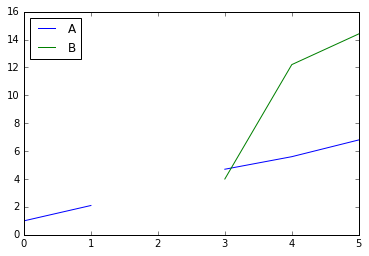

In [93]:
df_int.plot() 

In [98]:
df_int = df_int.interpolate()
df_int

,A,B
0,1.0,0.25
1,2.1,1.50
2,3.4,2.75
3,4.7,4.00
4,5.6,12.20
5,6.8,14.40


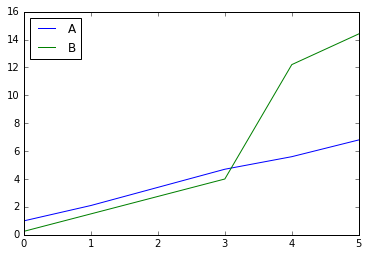

In [97]:
df_int.plot() 